# Image Processing Assessment

Hãy hoàn thành các task in đậm bên dưới.

**Dưới đây là một số code hữu ích:**

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [2]:
def display_img(img, cmap = None):
	fig = plt.figure(figsize = (12, 10))
	ax = fig.add_subplot(111)
	ax.imshow(img, cmap)

**TASK: Mở và hiển thị ảnh giaraffes.jpg nằm trong folder DATA.** 

In [9]:
path_image_giaraffes = "../DATA/giraffes.jpg"

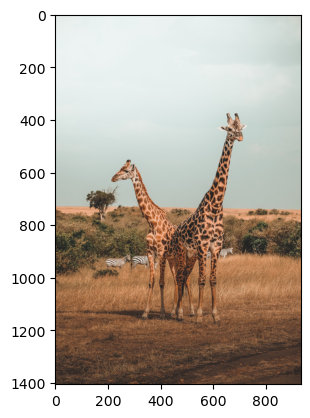

In [16]:
image_giaraffes = cv2.imread(path_image_giaraffes)
image_giaraffes_rgb = cv2.cvtColor(image_giaraffes, cv2.COLOR_BGR2RGB)
plt.imshow(image_giaraffes_rgb)

**TASK: Áp dụng ngưỡng nhị phân vào ảnh.** 

In [17]:
image_gray = cv2.imread(path_image_giaraffes, cv2.IMREAD_GRAYSCALE)

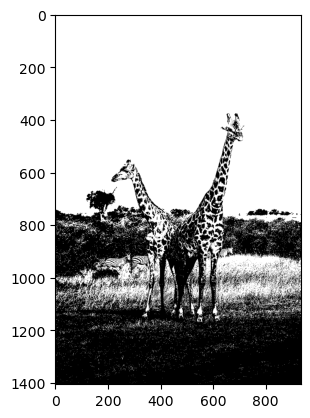

In [18]:
threshold_value = 127  # Giá trị ngưỡng (thay đổi nếu cần)
_, binary_image = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap = "gray")

**TASK: Mở file giaraffes.jpg từ folder DATA, chuyển không gian màu của nó thành HSV và hiển thị ảnh.** 

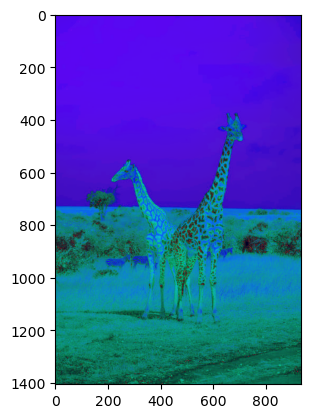

In [19]:
# Chuyển đổi sang không gian màu HSV
hsv_image = cv2.cvtColor(image_giaraffes, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

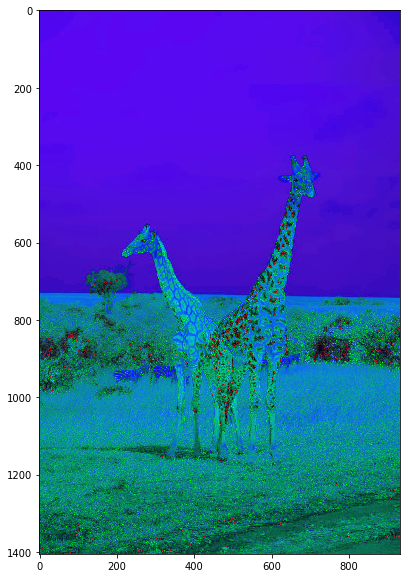

**TASK: Tạo low pass filter với 4x4 kernel chứa các giá trị 1/10 (0.01) rồi sử dụng 2-D Convolution để làm mờ ảnh hươu (hiển thị ở RGB chuẩn).**

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]], dtype=float32)

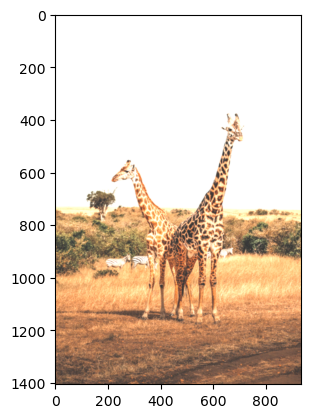

In [27]:
kernel = np.ones((4, 4), dtype = np.float32) * 1e-1
filtered_image = cv2.filter2D(image_giaraffes_rgb, -1, kernel)
plt.imshow(filtered_image)

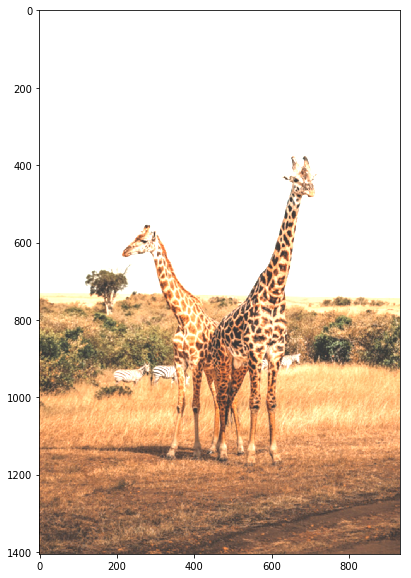

**TASK: Tạo Horizontal Sobel Filter (sobelx từ bài giảng) với kích thước kernel là 5 cho bản grayscale của ảnh hươu rồi hiển thị phiên bản hình ảnh đã lọc gradient.**

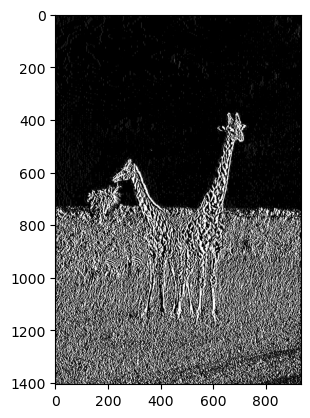

In [28]:

sobelx_kernel = np.array([
	[-1, -2, 0, 2, 1],
	[-4, -8, 0, 8, 4],
	[-6, -12, 0, 12, 6],
	[-4, -8, 0, 8, 4],
	[-1, -2, 0, 2, 1]
], dtype = np.float32)

sobelx_filtered = cv2.filter2D(image_gray, -1, sobelx_kernel)
plt.imshow(sobelx_filtered, cmap = 'gray')

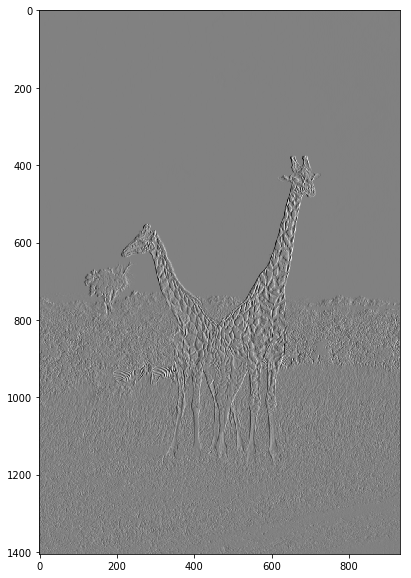

**TASK: Vẽ histogram màu cho kênh RED, BLUE và GREEn của ảnh hươu. Đặc biệt chú ý tới thứ tự các kênh.** 

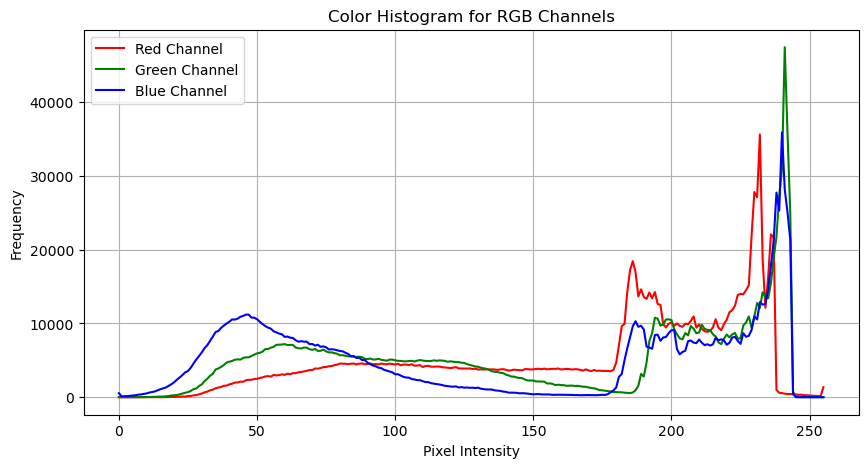

In [29]:

# Chuyển đổi thứ tự từ BGR sang RGB để xử lý đúng kênh
image_rgb = cv2.cvtColor(image_giaraffes, cv2.COLOR_BGR2RGB)

# Tách từng kênh màu
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# Tính histogram cho từng kênh
hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

# Vẽ histogram
plt.figure(figsize = (10, 5))

# Histogram của kênh RED
plt.plot(hist_red, color = 'red', label = 'Red Channel')

# Histogram của kênh GREEN
plt.plot(hist_green, color = 'green', label = 'Green Channel')

# Histogram của kênh BLUE
plt.plot(hist_blue, color = 'blue', label = 'Blue Channel')

# Thêm tiêu đề và chú thích
plt.title("Color Histogram for RGB Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

# Hiển thị biểu đồ
plt.grid()
plt.show()